In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pbp = pd.read_csv(f'pbp_data/play_by_play_2020.csv.gz', compression='gzip', low_memory=False)

In [3]:
dropbacks = pbp.loc[pbp.qb_dropback==1].copy()

In [4]:
dropbacks['ayts'] = dropbacks['air_yards'] - dropbacks['ydstogo']

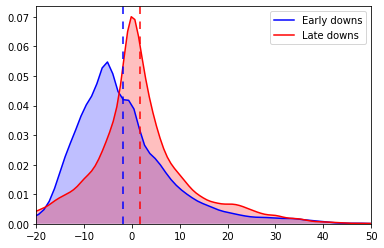

In [5]:
ax = sns.kdeplot(dropbacks.loc[(dropbacks.down.isin([1,2])), 'ayts'], color='b', shade=True, Label='Early downs')
sns.kdeplot(dropbacks.loc[(dropbacks.down.isin([3, 4])), 'ayts'], color='r', shade=True, Label='Late downs')
ax.axvline(x=dropbacks.loc[(dropbacks.down.isin([1,2])), 'ayts'].mean(), color='b').set_dashes([5,5])
ax.axvline(x=dropbacks.loc[(dropbacks.down.isin([3, 4])), 'ayts'].mean(), color='r').set_dashes([5,5])
ax.set(xlim=(-20,50))
ax.xaxis.set_ticks(np.arange(-20, 60, 10))

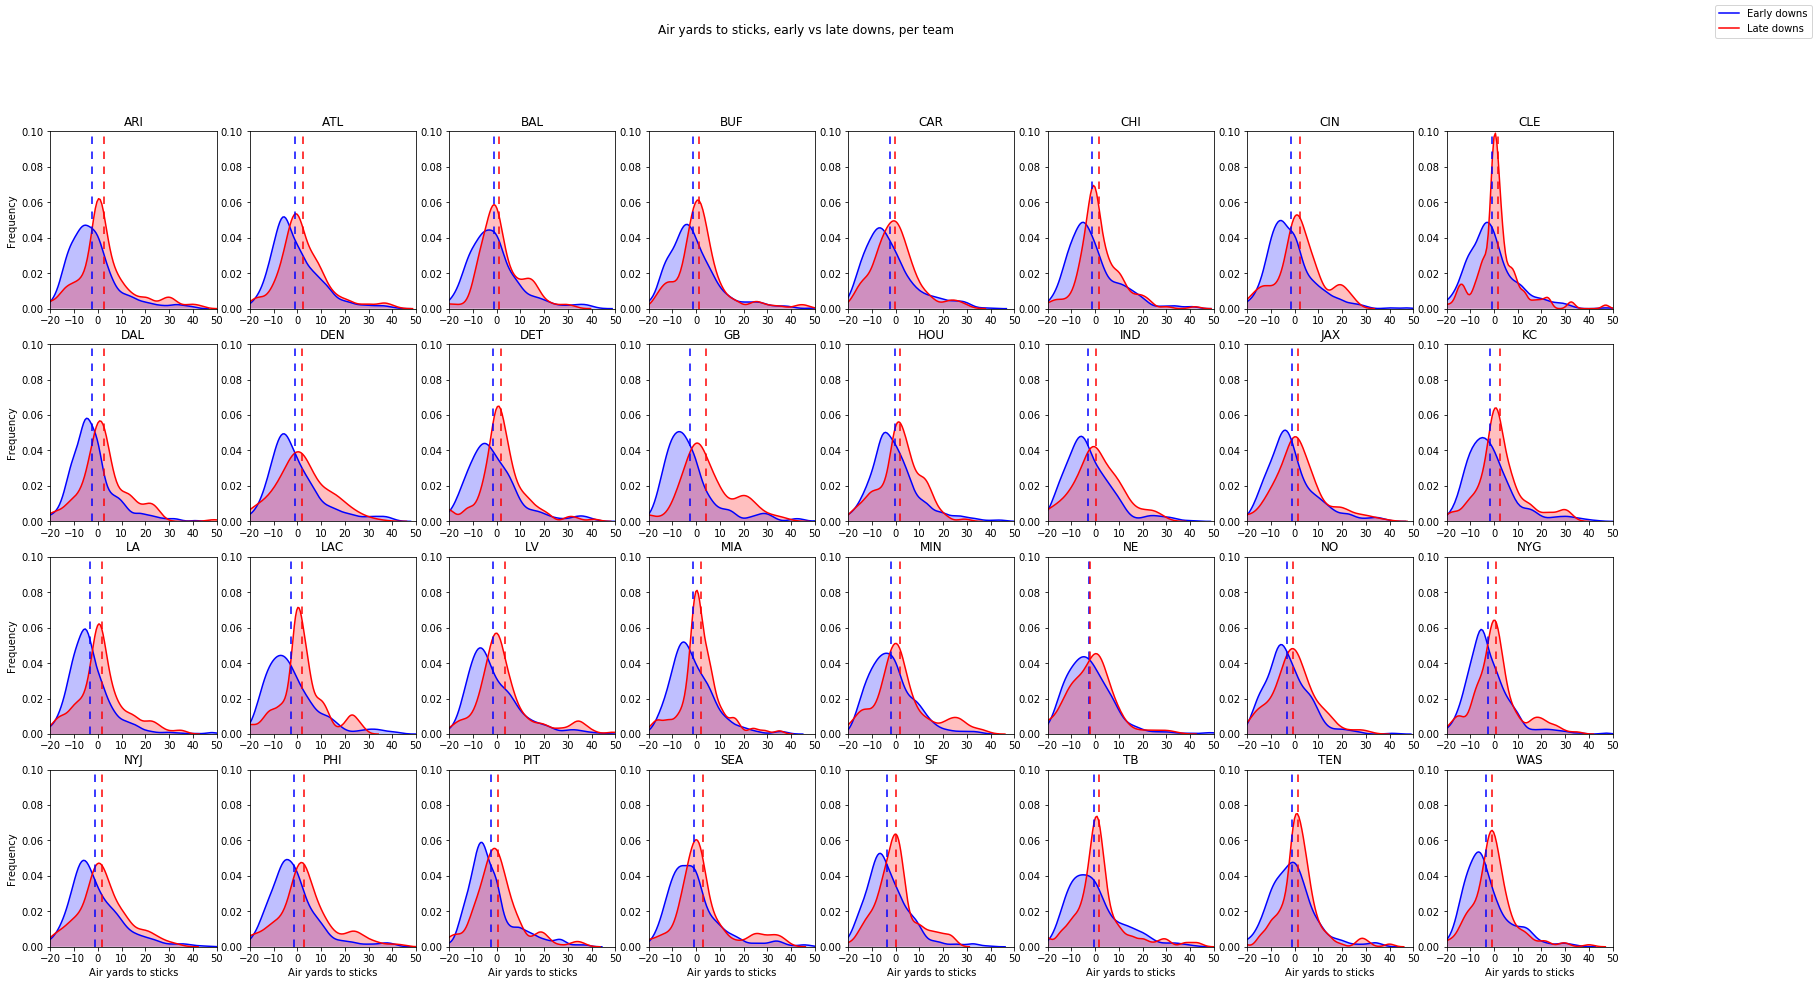

In [6]:
def plot_ayts(row, col, team):
    sns.kdeplot(dropbacks.loc[(dropbacks.posteam==team) & (dropbacks.down.isin([1,2])), 'ayts'], color='b', shade=True, Label='Early downs', ax=axs[row][col])
    sns.kdeplot(dropbacks.loc[(dropbacks.posteam==team) & (dropbacks.down.isin([3, 4])), 'ayts'], color='r', shade=True, Label='Late downs', ax=axs[row][col])
    ax = axs[row][col]
    ax.axvline(x=dropbacks.loc[(dropbacks.posteam==team) & (dropbacks.down.isin([1,2])), 'ayts'].mean(), color='b').set_dashes([5,5])
    ax.axvline(x=dropbacks.loc[(dropbacks.posteam==team) & (dropbacks.down.isin([3, 4])), 'ayts'].mean(), color='r').set_dashes([5,5])
    ax.set(xlim=(-20,50), ylim=(0,.1), title=team)
    ax.xaxis.set_ticks(np.arange(-20, 60, 10))
    ax.yaxis.set_ticks(np.arange(0, .11, .02))
    if col==0:
        ax.set(ylabel="Frequency")
    if row==3:
        ax.set(xlabel="Air yards to sticks")
    ax.get_legend().remove()
fig, axs = plt.subplots(nrows=4, ncols=8)
teams = sorted(dropbacks.posteam.dropna().unique())
for row in range(4):
    for col in range(8):
        posteam = teams[row*8 + col]
        plot_ayts(row, col, posteam)
fig.suptitle("Air yards to sticks, early vs late downs, per team")
fig.set_size_inches(28,15)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
fig.savefig('ayts_per_team.png')